In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import gensim

In [3]:
from gensim.models import Word2Vec, KeyedVectors

In [4]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt
import nltk

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
data = pd.read_csv("data/news_class.csv")

In [7]:
df = data.copy() # to be safe and avoid errors

In [8]:
df = df.loc[:,["data_id" , "content" , "category_level_1" , "category_level_2"]]

In [1023]:
df.groupby(['category_level_1'])['data_id'].agg('count')

category_level_1
arts, culture, entertainment and media        300
conflict, war and peace                       800
crime, law and justice                        500
disaster, accident and emergency incident     500
economy, business and finance                 400
education                                     607
environment                                   600
health                                        700
human interest                                600
labour                                        703
lifestyle and leisure                         300
politics                                      900
religion and belief                           800
science and technology                        800
society                                      1100
sport                                         907
weather                                       400
Name: data_id, dtype: int64

In [9]:
def labeler(dataframe_column):
    encoder=LabelEncoder()
    
    labels = encoder.fit_transform(dataframe_column)
    print(encoder.classes_)
    print("We did it boys , labels have been created")
    
    return(pd.DataFrame(labels))

In [10]:
# Function for removing ASCII characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting to lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing html
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

def lemm_text(text):
    lemm=WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    tokens = text
    return ' '.join([lemm.lemmatize(t) for t in tokens])

In [11]:
df['Cleaned'] = df['content'].apply(_removeNonAscii)
df['Cleaned'] = df.Cleaned.apply(func = make_lower_case)
df['Cleaned'] = df.Cleaned.apply(func = remove_stop_words)
df['Cleaned'] = df.Cleaned.apply(func = remove_punctuation)
df['Cleaned'] = df.Cleaned.apply(func = remove_html)
df['Cleaned'] = df.Cleaned.apply(func = lemm_text)
df = df.drop('content' , axis =1)

In [12]:
io = df.copy()

In [13]:
io = io.drop([374]).reset_index(drop=True)
io = io.drop([6527]).reset_index(drop=True)


corpus_full = []
for words in io['Cleaned']:
    corpus_full.append(words.split())  

In [14]:
def vectorizer():
    
    
    # Creating a list for storing the vectors ('Description' into vectors)
    #global word_embeddings
    word_embeddings = []
    i = 0
    # Reading the each 'Description'
    for line in io['Cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in model.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model.wv[word]
                else:
                    avgword2vec = avgword2vec + model.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)
        else:
            print("I found it , the error occurs at line:" , i)
          
        i +=1 

    return(pd.DataFrame(word_embeddings))  # Returning our Data as a Dataframe (aesthetic reasons)

In [15]:
model = Word2Vec.load("word2vec.model3")

In [16]:
vect = vectorizer()

In [17]:
y1 = labeler(io["category_level_1"])

['arts, culture, entertainment and media' 'conflict, war and peace'
 'crime, law and justice' 'disaster, accident and emergency incident'
 'economy, business and finance' 'education' 'environment' 'health'
 'human interest' 'labour' 'lifestyle and leisure' 'politics'
 'religion and belief' 'science and technology' 'society' 'sport'
 'weather']
We did it boys , labels have been created


In [18]:
X = vect.copy()

In [19]:
X

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.010030,-0.072825,-0.051542,0.033568,0.084110,0.027619,-0.071665,0.015907,-0.006390,0.152007,...,-0.087481,0.150550,0.010014,0.063487,0.218890,0.049933,0.014407,-0.129096,0.003949,-0.131842
1,0.071578,-0.083879,-0.080275,0.015637,0.068045,0.007964,-0.054446,0.003107,0.003455,0.160702,...,-0.032729,0.109924,0.010929,0.027677,0.182586,0.082423,-0.014971,-0.097462,-0.027377,-0.059375
2,0.028660,-0.003605,-0.043669,0.050716,0.109462,0.030837,-0.033665,0.022952,-0.026909,0.246786,...,-0.016610,0.091539,-0.029639,0.123434,0.160820,0.140771,-0.031121,-0.071247,-0.039745,-0.078560
3,0.068074,-0.112016,-0.055053,0.045375,0.063676,0.016817,-0.061693,-0.026442,-0.031120,0.191916,...,-0.073135,0.135709,0.006571,0.004580,0.166603,0.121948,-0.031010,-0.095062,0.007649,-0.106070
4,0.040953,-0.028588,-0.063608,0.046010,0.081183,-0.021608,-0.077216,0.027718,-0.030726,0.168264,...,-0.064928,0.073787,-0.000367,0.074108,0.142589,0.093344,0.004230,-0.099472,-0.069675,-0.046723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,0.025258,-0.056760,-0.053916,-0.080924,0.025728,-0.042500,0.016543,-0.056844,-0.068292,0.035164,...,-0.116704,0.099249,0.008260,0.035744,0.203707,-0.003986,0.023136,-0.156268,-0.018444,-0.033398
10911,0.122435,-0.154742,-0.159965,-0.032322,0.095427,-0.047862,0.000538,-0.144428,-0.148185,0.052159,...,-0.061774,0.067999,0.021077,0.097443,0.181980,0.091247,0.007482,-0.320918,-0.028273,-0.004733
10912,0.079171,-0.031492,-0.051477,-0.086577,0.101841,0.017272,-0.046363,-0.008180,-0.058952,0.015870,...,-0.013864,0.051082,-0.004890,0.170762,0.141724,0.000773,-0.022615,-0.110620,0.037668,-0.070821
10913,0.015078,-0.098757,-0.091811,-0.046112,0.102823,0.005763,-0.019206,-0.023700,-0.079233,0.044035,...,-0.014461,0.088623,0.036835,0.127098,0.156737,-0.003581,-0.047630,-0.176579,0.055320,-0.069404


# BUILDING OUR KERAS MODEL

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2,random_state=42)

In [21]:
X_train.shape

(8732, 200)

In [22]:
y_train

,0
6365,14
157,2
6965,6
6350,14
1441,6
...,...
5734,10
5191,2
5390,10
860,16


In [23]:
y_train.values

array([[14],
       [ 2],
       [ 6],
       ...,
       [10],
       [16],
       [14]])

In [24]:
X_train = X_train.values

In [25]:
X_train.shape

(8732, 200)

In [1024]:
y_cat = to_categorical(y1)

In [26]:
y_train1 = to_categorical(y_train)

In [27]:
y_test1 = to_categorical(y_test)

In [28]:
y_train1

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
X_val = X_train[7859:]
y_val = y_train1[7859:]

In [30]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_val = np.expand_dims(X_val, -1)

In [31]:
X_train.shape , X_test.shape , X_val.shape

((8732, 200, 1), (2183, 200, 1), (873, 200, 1))

## MODEL

In [32]:
from tensorflow.keras.layers import LSTM , Dropout , SpatialDropout1D

In [33]:
in_dim = 200

In [34]:
jazz_size = 32

In [35]:
tot_layers = 600

In [36]:
(tot_layers//3)*2

400

In [37]:
n_most_common_words = 15
emb_dim = 200

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
from tensorflow.keras.layers import Flatten , Input , Conv2D , MaxPooling2D , BatchNormalization

In [42]:
rnn_model = tf.keras.Sequential([
        tf.keras.layers.LSTM(70,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences = True),
        tf.keras.layers.LSTM(300, return_sequences = True, activation=tf.nn.relu),
        tf.keras.layers.LSTM(250, return_sequences = True, activation=tf.nn.relu),
        tf.keras.layers.LSTM(180, return_sequences = False, activation=tf.nn.relu),
        tf.keras.layers.Dense(80,activation = "leaky_relu"),
        tf.keras.layers.Dense(40,activation = "leaky_relu"),
        tf.keras.layers.Dense(25,activation = "leaky_relu"),
        tf.keras.layers.Dense(17, activation='softmax')
    ])
    
rnn_model.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [41]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [ ]:
#model10.compile(optimizer = opt , 
       #       loss = 'categorical_crossentropy' ,
        #      metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            #           tf.keras.metrics.Precision(name='precision'),
           #            tf.keras.metrics.Recall(name='recall')])

In [43]:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 200, 70)           20160     
                                                                 
 lstm_5 (LSTM)               (None, 200, 300)          445200    
                                                                 
 lstm_6 (LSTM)               (None, 200, 250)          551000    
                                                                 
 lstm_7 (LSTM)               (None, 180)               310320    
                                                                 
 dense_4 (Dense)             (None, 80)                14480     
                                                                 
 dense_5 (Dense)             (None, 40)                3240      
                                                                 
 dense_6 (Dense)             (None, 25)               

In [53]:
rnn_model.fit(X_train[:7859], y_train1[:7859], batch_size = 32 ,epochs=5, validation_data=(X_val,y_val) ,verbose =1)



#model10.fit(X_train[:7859] , y_train1[:7859] , batch_size = 64 , epochs = 10 , validation_data=(X_val,y_val) ,verbose =1)

Epoch 1/5
246/246 [==============================] - 214s 870ms/step - loss: 2.7762 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.7702 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
246/246 [==============================] - 220s 894ms/step - loss: 2.7759 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.7680 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
246/246 [==============================] - 226s 918ms/step - loss: 2.7747 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.7711 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
246/246 [==============================] - 205s 832ms/step - loss: 2.7746 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.7664 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
246/246 [=========

In [54]:
#model10.summary()

In [55]:
scores = rnn_model.evaluate(X_test, y_test1)

for i, m in enumerate(rnn_model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

69/69 [==============================] - 16s 224ms/step - loss: 2.7833 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00

loss: 2.783

accuracy: 0.941

precision: 0.000

recall: 0.000


In [56]:
predictions = np.argmax(rnn_model.predict(X_test), axis=-1)

69/69 [==============================] - 16s 233ms/step


In [57]:
predictions

array([14, 14, 14, ..., 14, 14, 14], dtype=int64)

In [58]:
#len(predictions)

In [59]:
#y_test.shape

In [60]:
y_test.values

array([[14],
       [ 1],
       [16],
       ...,
       [11],
       [14],
       [12]])

In [61]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.00      0.00      0.00       176
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00       126
           7       0.00      0.00      0.00       136
           8       0.00      0.00      0.00       122
           9       0.00      0.00      0.00       155
          10       0.00      0.00      0.00        61
          11       0.00      0.00      0.00       172
          12       0.00      0.00      0.00       182
          13       0.00      0.00      0.00       151
          14       0.09      1.00      0.17       200
          15       0.00      0.00      0.00       169
          16       0.00      0.00      0.00        77

    accuracy              

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
    # Evaluating the model
print('Precision is {}'.format(precision_score(y_test.values, predictions, average='macro')))
print('Recall is {}'.format(recall_score(y_test.values, predictions, average='macro')))
print('F1:', f1_score(y_test.values, predictions, average='macro'))

NameError: name 'precision_score' is not defined

# CNN

In [210]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv1D(256,3,input_shape=(200,1), activation='leaky_relu'))
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(128,3,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(64,3,activation='leaky_relu')) 
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(30,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(17,activation='softmax'))

In [211]:
cnn_model.compile(optimizer='adam', 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [275]:
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 198, 256)          1024      
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 99, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_16 (Conv1D)          (None, 97, 128)           98432     
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 48, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_17 (Conv1D)          (None, 46, 64)            24640     
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 23, 64)          

In [362]:
cnn_model.fit(X_train[:7859], y_train1[:7859], batch_size = 16 ,epochs=2, validation_data=(X_val,y_val) ,verbose =1)

Epoch 1/2
492/492 [==============================] - 7s 15ms/step - loss: 0.1297 - accuracy: 0.9951 - precision: 0.9617 - recall: 0.9551 - val_loss: 2.4032 - val_accuracy: 0.9572 - val_precision: 0.6444 - val_recall: 0.6082
Epoch 2/2
492/492 [==============================] - 7s 14ms/step - loss: 0.1524 - accuracy: 0.9941 - precision: 0.9544 - recall: 0.9449 - val_loss: 4.4502 - val_accuracy: 0.9464 - val_precision: 0.5459 - val_recall: 0.5315


In [ ]:
# 30h epanalipsi

In [363]:
scores = cnn_model.evaluate(X_test, y_test1)

for i, m in enumerate(cnn_model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

69/69 [==============================] - 1s 9ms/step - loss: 3.9596 - accuracy: 0.9488 - precision: 0.5665 - recall: 0.5525

loss: 3.960

accuracy: 0.949

precision: 0.566

recall: 0.552


In [364]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

69/69 [==============================] - 1s 8ms/step


In [365]:
predictions

array([12,  1, 16, ..., 11,  9, 12], dtype=int64)

In [366]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.60      0.22      0.32        68
           1       0.51      0.86      0.64       176
           2       0.91      0.32      0.47        97
           3       0.82      0.44      0.58        90
           4       0.65      0.49      0.56        93
           5       0.76      0.39      0.52       108
           6       0.87      0.48      0.62       126
           7       0.48      0.89      0.62       136
           8       0.73      0.37      0.49       122
           9       0.54      0.79      0.64       155
          10       0.75      0.20      0.31        61
          11       0.39      0.59      0.47       172
          12       0.45      0.87      0.59       182
          13       0.40      0.58      0.48       151
          14       0.79      0.07      0.14       200
          15       0.92      0.58      0.71       169
          16       0.88      0.86      0.87        77

    accuracy              

In [367]:
# gia batch = 16

# 1h epan -->accuracy = 67%

In [368]:
# 2h epan -->accuracy = 67%

In [369]:
# 3h epan -->accuracy = 70%

In [370]:
# 4h epan -->accuracy = 69%

In [ ]:
# 5h epan -->accuracy = 72%

In [ ]:
# 6h epan -->accuracy = 72%

In [ ]:
# 7h epan -->accuracy = 72%

In [ ]:
# 8h epan -->accuracy = 72%

In [ ]:
# 9h epan -->accuracy = 75%

In [ ]:
# 12h epanalipsi --- > 72%

In [371]:
# 13h epanalipsi -- >72%

In [ ]:
# 20h epanalipsi --- > 70%

In [ ]:
# 23h epanalipsi --- > 70%

### 2nd CNN model

In [427]:
cnn_model2 = tf.keras.Sequential()
cnn_model2.add(tf.keras.layers.Conv1D(256,3,input_shape=(200,1), activation='leaky_relu'))
cnn_model2.add(tf.keras.layers.MaxPool1D())
cnn_model2.add(tf.keras.layers.Conv1D(128,3,activation='leaky_relu'))
cnn_model2.add(tf.keras.layers.MaxPool1D())
cnn_model2.add(tf.keras.layers.Conv1D(256,3,activation='leaky_relu'))
cnn_model2.add(tf.keras.layers.MaxPool1D())
cnn_model2.add(tf.keras.layers.Conv1D(128,3,activation='leaky_relu'))
cnn_model2.add(tf.keras.layers.MaxPool1D())
cnn_model2.add(tf.keras.layers.Conv1D(64,3,activation='leaky_relu')) 
cnn_model2.add(tf.keras.layers.MaxPool1D())
cnn_model2.add(tf.keras.layers.BatchNormalization())
cnn_model2.add(tf.keras.layers.Flatten())
cnn_model2.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model2.add(tf.keras.layers.Dense(30,activation='leaky_relu'))
cnn_model2.add(tf.keras.layers.Dense(17,activation='softmax'))

In [428]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [429]:
cnn_model2.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [461]:
cnn_model2.fit(X_train[:7859], y_train1[:7859], batch_size = 8 ,epochs=2, validation_data=(X_val,y_val) ,verbose =1)

Epoch 1/2
983/983 [==============================] - 13s 13ms/step - loss: 0.8222 - accuracy: 0.9709 - precision: 0.8057 - recall: 0.6664 - val_loss: 2.3581 - val_accuracy: 0.9439 - val_precision: 0.5277 - val_recall: 0.4467
Epoch 2/2
983/983 [==============================] - 12s 12ms/step - loss: 0.8222 - accuracy: 0.9707 - precision: 0.8021 - recall: 0.6654 - val_loss: 6.6109 - val_accuracy: 0.9226 - val_precision: 0.3300 - val_recall: 0.3058


In [463]:
scores = cnn_model2.evaluate(X_test, y_test1)

for i, m in enumerate(cnn_model2.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

69/69 [==============================] - 1s 14ms/step - loss: 1.0674 - accuracy: 0.9667 - precision: 0.7649 - recall: 0.6276

loss: 1.067

accuracy: 0.967

precision: 0.765

recall: 0.628


In [464]:
predictions = np.argmax(cnn_model2.predict(X_test), axis=-1)

69/69 [==============================] - 1s 11ms/step


In [465]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55        68
           1       0.78      0.73      0.75       176
           2       0.70      0.72      0.71        97
           3       0.71      0.67      0.69        90
           4       0.92      0.52      0.66        93
           5       0.54      0.78      0.64       108
           6       0.77      0.79      0.78       126
           7       0.69      0.76      0.72       136
           8       0.72      0.62      0.67       122
           9       0.84      0.63      0.72       155
          10       0.55      0.77      0.64        61
          11       0.56      0.64      0.60       172
          12       0.71      0.80      0.75       182
          13       0.54      0.67      0.60       151
          14       0.65      0.47      0.55       200
          15       0.87      0.86      0.87       169
          16       0.86      0.95      0.90        77

    accuracy              

In [466]:
# 2 epanalipseis --> 55%
# 4 epanalipseis --> 65%
# 6 epanalipseis --> 69%
# 7 epanalipseis --> 63%
# 8 epanalipseis --> 68%
# 9 epanalipseis --> 26%
# 10 --> 0
# bATCH = 16

In [467]:
# 5 epanalipseis --> 66%
# 8 epanalipseis --> 68%
# 10 epanalipseis --> 70%
# 11 epanalipseis --> 70%
# 12 epanalipseis --> 70%
# 14 epanalipseis --> 69%
# 16 epanalipseis --> 71%
# 18 epanalipseis --> 71%
# 10 --> 0
# bATCH = 8

### 3rd CNN model

In [483]:
cnn_model3 = tf.keras.Sequential()
cnn_model3.add(tf.keras.layers.Conv1D(1024,3,input_shape=(200,1), activation='leaky_relu'))
cnn_model3.add(tf.keras.layers.MaxPool1D())
cnn_model3.add(tf.keras.layers.Conv1D(512,3,activation='leaky_relu'))
cnn_model3.add(tf.keras.layers.MaxPool1D())
cnn_model3.add(tf.keras.layers.Conv1D(256,3,activation='leaky_relu'))
cnn_model3.add(tf.keras.layers.MaxPool1D())
cnn_model3.add(tf.keras.layers.Conv1D(128,3,activation='leaky_relu'))
cnn_model3.add(tf.keras.layers.MaxPool1D())
cnn_model3.add(tf.keras.layers.Conv1D(64,3,activation='leaky_relu')) 
cnn_model3.add(tf.keras.layers.MaxPool1D())
cnn_model3.add(tf.keras.layers.BatchNormalization())
cnn_model3.add(tf.keras.layers.Flatten())
cnn_model3.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model3.add(tf.keras.layers.Dense(30,activation='leaky_relu'))
cnn_model3.add(tf.keras.layers.Dense(17,activation='softmax'))

In [484]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [485]:
cnn_model3.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [486]:
cnn_model3.fit(X_train[:7859], y_train1[:7859], batch_size = 16 ,epochs=5, validation_data=(X_val,y_val) ,verbose =1)

Epoch 1/5
492/492 [==============================] - 93s 184ms/step - loss: 1.9089 - accuracy: 0.9461 - precision: 0.6361 - recall: 0.1960 - val_loss: 15.4190 - val_accuracy: 0.8942 - val_precision: 0.1008 - val_recall: 0.1008
Epoch 2/5
492/492 [==============================] - 81s 164ms/step - loss: 1.4743 - accuracy: 0.9523 - precision: 0.6875 - recall: 0.3474 - val_loss: 5.2075 - val_accuracy: 0.9125 - val_precision: 0.2219 - val_recall: 0.1947
Epoch 3/5
492/492 [==============================] - 80s 163ms/step - loss: 1.3152 - accuracy: 0.9568 - precision: 0.7241 - recall: 0.4305 - val_loss: 9.6070 - val_accuracy: 0.9049 - val_precision: 0.1584 - val_recall: 0.1432
Epoch 4/5
492/492 [==============================] - 81s 165ms/step - loss: 1.2120 - accuracy: 0.9598 - precision: 0.7421 - recall: 0.4863 - val_loss: 22.8776 - val_accuracy: 0.8943 - val_precision: 0.1019 - val_recall: 0.1019
Epoch 5/5
492/492 [==============================] - 86s 174ms/step - loss: 1.1614 - accuracy:

In [487]:
scores = cnn_model3.evaluate(X_test, y_test1)

for i, m in enumerate(cnn_model3.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

69/69 [==============================] - 6s 83ms/step - loss: 1.4185 - accuracy: 0.9558 - precision: 0.6814 - recall: 0.4672

loss: 1.418

accuracy: 0.956

precision: 0.681

recall: 0.467


In [488]:
predictions = np.argmax(cnn_model3.predict(X_test), axis=-1)

69/69 [==============================] - 6s 80ms/step


In [489]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.75      0.13      0.23        68
           1       0.88      0.39      0.54       176
           2       0.34      0.89      0.50        97
           3       0.65      0.69      0.67        90
           4       0.71      0.58      0.64        93
           5       0.83      0.19      0.30       108
           6       0.64      0.85      0.73       126
           7       0.75      0.57      0.65       136
           8       0.56      0.29      0.38       122
           9       0.91      0.41      0.56       155
          10       0.00      0.00      0.00        61
          11       0.50      0.56      0.53       172
          12       0.74      0.57      0.64       182
          13       0.49      0.70      0.58       151
          14       0.31      0.73      0.44       200
          15       0.81      0.83      0.82       169
          16       0.98      0.77      0.86        77

    accuracy              

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Building a different w2vec model to really see what is the root of evil on our 70% accuracy

In [216]:
model_w2v2= Word2Vec(sentences=corpus_full, vector_size=500, window=4, min_count=15, sg = 1 , hs = 1)  # skipgram architecture

In [217]:
model_w2v2.save("word2vec.i_dont_even_know_how_shitty_this_model_is")

In [491]:
model_w2v2 = Word2Vec.load("word2vec.i_dont_even_know_how_shitty_this_model_is")

In [492]:
def vectorizer2():
    
    
    # Creating a list for storing the vectors ('Description' into vectors)
    #global word_embeddings
    word_embeddings = []
    i = 0
    # Reading the each 'Description'
    for line in io['Cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in model_w2v2.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model_w2v2.wv[word]
                else:
                    avgword2vec = avgword2vec + model_w2v2.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)
        else:
            print("I found it , the error occurs at line:" , i)
          
        i +=1 

    return(pd.DataFrame(word_embeddings))  # Returning our Data as a Dataframe (aesthetic reasons)

In [493]:
X2 = vectorizer2()

In [625]:
X_train, X_test, y_train, y_test = train_test_split(X2.values, y1, test_size=0.2,random_state=42)

In [628]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_val = np.expand_dims(X_val, -1)

In [629]:
X_train.shape

(8732, 500, 1, 1)

In [630]:
y_train1 = to_categorical(y_train)

In [631]:
y_test1 = to_categorical(y_test)

In [632]:
X_val = X_train[7859:]
y_val = y_train1[7859:]

## KERAS TIME

In [711]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv1D(1024,2,input_shape=(500,1), activation='leaky_relu'))
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(512,2,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(256,2,activation='leaky_relu')) 
cnn_model.add(tf.keras.layers.MaxPool1D())
#cnn_model.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu')) 
#cnn_model.add(tf.keras.layers.MaxPool1D())
#cnn_model.add(tf.keras.layers.Conv1D(32,2,activation='leaky_relu'))
#cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(17,activation='softmax'))

In [712]:
cnn_model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_132 (Conv1D)         (None, 499, 1024)         3072      
                                                                 
 max_pooling1d_132 (MaxPool  (None, 249, 1024)         0         
 ing1D)                                                          
                                                                 
 conv1d_133 (Conv1D)         (None, 248, 512)          1049088   
                                                                 
 max_pooling1d_133 (MaxPool  (None, 124, 512)          0         
 ing1D)                                                          
                                                                 
 conv1d_134 (Conv1D)         (None, 123, 256)          262400    
                                                                 
 max_pooling1d_134 (MaxPool  (None, 61, 256)         

In [713]:
cnn_model.compile(optimizer='adam', 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [714]:
#opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
 #   beta_2=0.999,
  #  use_ema=True,
   # ema_momentum=0.99)

In [715]:
#model.compile(optimizer = opt , 
 #             loss = 'categorical_crossentropy' ,
  #            metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
   #                    tf.keras.metrics.Precision(name='precision'),
    #                   tf.keras.metrics.Recall(name='recall')])

In [720]:
cnn_model.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 1 , validation_data=(X_val,y_val) ,verbose =1)

246/246 [==============================] - 141s 573ms/step - loss: 0.2462 - accuracy: 0.9904 - precision: 0.9300 - recall: 0.9044 - val_loss: 4.0256 - val_accuracy: 0.9384 - val_precision: 0.4756 - val_recall: 0.4570


In [721]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

69/69 [==============================] - 11s 162ms/step


In [722]:
predictions

array([11,  1, 16, ..., 11,  9, 12], dtype=int64)

In [723]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        68
           1       0.95      0.11      0.20       176
           2       0.68      0.52      0.59        97
           3       0.56      0.64      0.60        90
           4       0.77      0.29      0.42        93
           5       0.73      0.38      0.50       108
           6       0.90      0.43      0.58       126
           7       0.69      0.55      0.61       136
           8       0.85      0.09      0.16       122
           9       0.88      0.34      0.49       155
          10       0.87      0.44      0.59        61
          11       0.24      0.76      0.36       172
          12       0.91      0.24      0.38       182
          13       0.19      0.87      0.32       151
          14       0.73      0.10      0.17       200
          15       0.74      0.91      0.82       169
          16       0.69      0.91      0.79        77

    accuracy              

In [725]:
# 11 epochs 73% accuracy

In [790]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv1D(180,2,input_shape=(500,1), activation='leaky_relu')) # for the first comment 256 == 128
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) #for the first comment 128 == 64
cnn_model.add(tf.keras.layers.MaxPool1D())
#cnn_model.add(tf.keras.layers.Conv1D(256,2,activation='leaky_relu')) 
#cnn_model.add(tf.keras.layers.MaxPool1D())
#cnn_model.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu')) 
#cnn_model.add(tf.keras.layers.MaxPool1D())
#cnn_model.add(tf.keras.layers.Conv1D(32,2,activation='leaky_relu'))
#cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(17,activation='softmax'))

In [791]:
cnn_model.compile(optimizer='adam', 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [812]:
cnn_model.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 1 , validation_data=(X_val,y_val) ,verbose =1)

246/246 [==============================] - 15s 59ms/step - loss: 0.5433 - accuracy: 0.9803 - precision: 0.8690 - recall: 0.7828 - val_loss: 1.2217 - val_accuracy: 0.9646 - val_precision: 0.7454 - val_recall: 0.6037


In [813]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

69/69 [==============================] - 1s 15ms/step


In [814]:
predictions

array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [815]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.40      0.60      0.48        68
           1       0.80      0.77      0.79       176
           2       0.76      0.39      0.52        97
           3       0.79      0.47      0.59        90
           4       0.67      0.49      0.57        93
           5       0.73      0.70      0.72       108
           6       0.87      0.67      0.76       126
           7       0.54      0.88      0.66       136
           8       0.70      0.52      0.59       122
           9       0.66      0.83      0.74       155
          10       0.77      0.56      0.65        61
          11       0.63      0.57      0.60       172
          12       0.68      0.79      0.73       182
          13       0.55      0.50      0.53       151
          14       0.49      0.67      0.56       200
          15       0.97      0.69      0.81       169
          16       0.81      0.97      0.88        77

    accuracy              

In [773]:
# 1 epoch --->71% acc
# 2 epoch --->73% acc
# 4 epoch --->74% acc
# 6 epoch --->74% acc
# 7 epoch --->75% acc
# 9 epoch --->75% acc

In [816]:
scores = cnn_model.evaluate(X_test, y_test1)

for i, m in enumerate(cnn_model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

69/69 [==============================] - 1s 15ms/step - loss: 1.1782 - accuracy: 0.9641 - precision: 0.7364 - recall: 0.6079

loss: 1.178

accuracy: 0.964

precision: 0.736

recall: 0.608


In [818]:
scores = cnn_model.evaluate(X_train, y_train1)

for i, m in enumerate(cnn_model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

273/273 [==============================] - 4s 15ms/step - loss: 0.7044 - accuracy: 0.9749 - precision: 0.8372 - recall: 0.7108

loss: 0.704

accuracy: 0.975

precision: 0.837

recall: 0.711


In [840]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv1D(360,2,input_shape=(500,1), activation='leaky_relu')) # for the first comment 256 == 128
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(180,2,activation='leaky_relu')) #for the first comment 128 == 64
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(90,2,activation='leaky_relu')) 
cnn_model.add(tf.keras.layers.MaxPool1D())
#cnn_model.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu')) 
#cnn_model.add(tf.keras.layers.MaxPool1D())
#cnn_model.add(tf.keras.layers.Conv1D(32,2,activation='leaky_relu'))
#cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(17,activation='softmax'))

In [841]:
cnn_model.compile(optimizer='adam', 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [842]:
history_cnn = cnn_model.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 7 , validation_data=(X_val,y_val) ,verbose =1)

Epoch 1/7
246/246 [==============================] - 29s 109ms/step - loss: 1.4037 - accuracy: 0.9571 - precision: 0.7465 - recall: 0.4098 - val_loss: 2.4173 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/7
246/246 [==============================] - 30s 122ms/step - loss: 0.9739 - accuracy: 0.9662 - precision: 0.7830 - recall: 0.5885 - val_loss: 1.7162 - val_accuracy: 0.9480 - val_precision: 0.8806 - val_recall: 0.1352
Epoch 3/7
246/246 [==============================] - 24s 97ms/step - loss: 0.8213 - accuracy: 0.9712 - precision: 0.8161 - recall: 0.6578 - val_loss: 2.3816 - val_accuracy: 0.9306 - val_precision: 0.3728 - val_recall: 0.2635
Epoch 4/7
246/246 [==============================] - 23s 95ms/step - loss: 0.7128 - accuracy: 0.9747 - precision: 0.8352 - recall: 0.7091 - val_loss: 1.3031 - val_accuracy: 0.9612 - val_precision: 0.7004 - val_recall: 0.5945
Epoch 5/7
246/246 [==============================] - 24s 99ms/step - loss: 0.6196 - accura

Text(0, 0.5, 'Training Error')

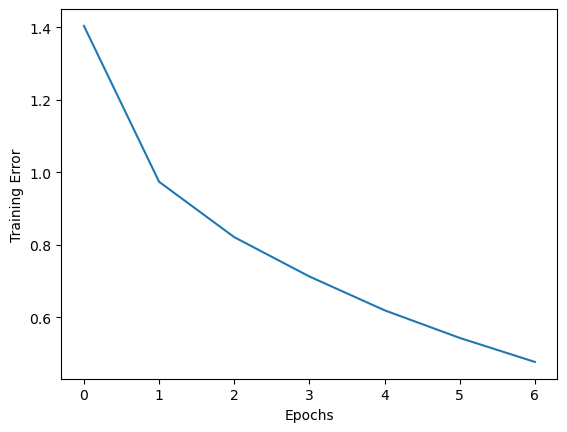

In [843]:
plt.plot(history_cnn.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

Text(0, 0.5, 'Accuracy')

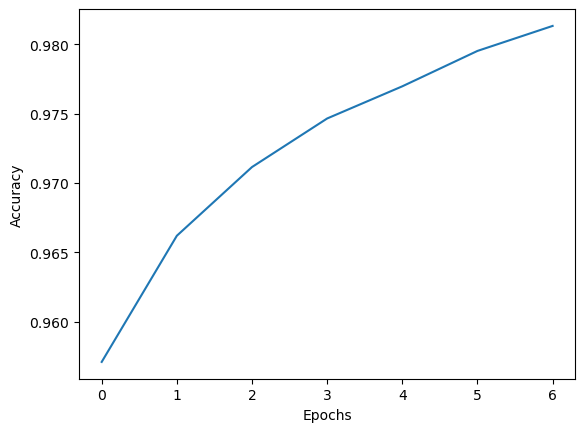

In [844]:
plt.plot(history_cnn.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [855]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

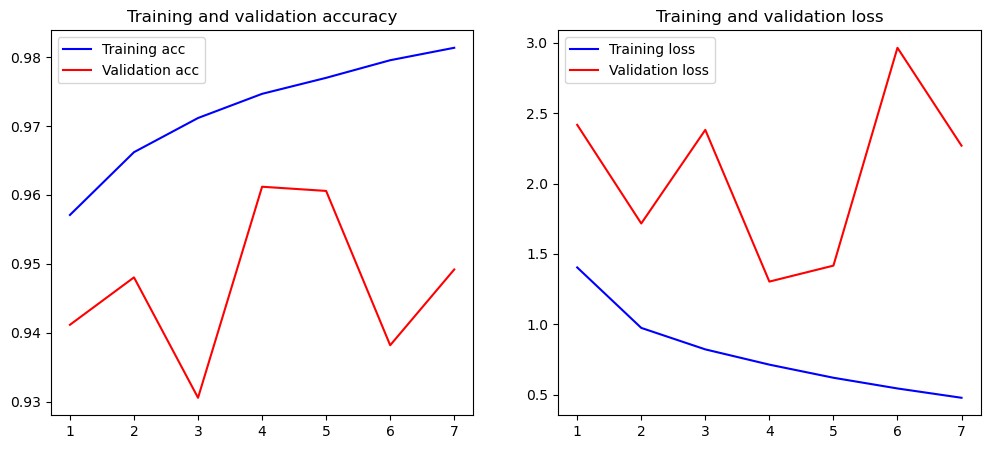

In [856]:
plot_history(history_cnn)

In [849]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)
print(classification_report(y_test.values , predictions))

69/69 [==============================] - 2s 25ms/step
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        68
           1       0.96      0.38      0.54       176
           2       1.00      0.05      0.10        97
           3       0.40      0.70      0.51        90
           4       0.57      0.67      0.61        93
           5       0.78      0.27      0.40       108
           6       0.96      0.40      0.57       126
           7       0.63      0.76      0.69       136
           8       0.67      0.57      0.62       122
           9       0.73      0.58      0.65       155
          10       0.29      0.93      0.45        61
          11       0.52      0.56      0.54       172
          12       0.31      0.92      0.47       182
          13       0.64      0.46      0.54       151
          14       0.93      0.07      0.12       200
          15       0.70      0.88      0.78       169
          16       0.75    

In [827]:
# 5 epochs --> 75%

## Model 2

In [316]:
model2 = Sequential()
model2.add(Dense(100,input_dim=500,activation = "leaky_relu"))
model2.add(Dense(180,activation = "leaky_relu"))
model2.add(Dropout(0.2))
model2.add(Dense(60,activation = "leaky_relu"))
#model2.add(Dense(30,activation = "leaky_relu"))
model2.add(Dense(17,activation = "softmax"))

In [317]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [318]:
model2.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [325]:
model2.fit(X_train[:7859] , y_train1[:7859] , batch_size = 64 , epochs = 10 , validation_data=(X_val,y_val) ,verbose =1)

Epoch 1/10
123/123 [==============================] - 1s 4ms/step - loss: 0.6890 - accuracy: 0.9749 - precision: 0.8340 - recall: 0.7168 - val_loss: 1.0679 - val_accuracy: 0.9682 - val_precision: 0.7663 - val_recall: 0.6609
Epoch 2/10
123/123 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.9750 - precision: 0.8303 - recall: 0.7234 - val_loss: 1.1319 - val_accuracy: 0.9675 - val_precision: 0.7589 - val_recall: 0.6564
Epoch 3/10
123/123 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.9751 - precision: 0.8340 - recall: 0.7210 - val_loss: 1.1288 - val_accuracy: 0.9676 - val_precision: 0.7593 - val_recall: 0.6575
Epoch 4/10
123/123 [==============================] - 0s 4ms/step - loss: 0.6285 - accuracy: 0.9768 - precision: 0.8444 - recall: 0.7431 - val_loss: 1.1321 - val_accuracy: 0.9683 - val_precision: 0.7627 - val_recall: 0.6701
Epoch 5/10
123/123 [==============================] - 0s 4ms/step - loss: 0.6421 - accuracy: 0.9769 - pr

In [326]:
predictions = np.argmax(model2.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [327]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        68
           1       0.78      0.82      0.80       176
           2       0.69      0.74      0.71        97
           3       0.72      0.63      0.67        90
           4       0.76      0.61      0.68        93
           5       0.68      0.81      0.74       108
           6       0.85      0.83      0.84       126
           7       0.74      0.78      0.76       136
           8       0.77      0.72      0.74       122
           9       0.81      0.71      0.76       155
          10       0.78      0.75      0.77        61
          11       0.66      0.63      0.64       172
          12       0.79      0.80      0.79       182
          13       0.68      0.70      0.69       151
          14       0.67      0.67      0.67       200
          15       0.86      0.89      0.88       169
          16       0.84      0.99      0.90        77

    accuracy              

In [328]:
    # Evaluating the model
print('Precision is {}'.format(precision_score(y_test.values, predictions, average='macro')))
print('Recall is {}'.format(recall_score(y_test.values, predictions, average='macro')))
print('F1:', f1_score(y_test.values, predictions, average='macro'))

Precision is 0.7497295033663197
Recall is 0.7478797082622529
F1: 0.7468548054573868


In [324]:
# 74% for 10 epochs (model2)

In [329]:
# 75% for 20 epochs

### Model 3

In [372]:
model6 = Sequential()
model6.add(Dense(100,input_dim=500,activation = "leaky_relu"))
model6.add(Dense(180,activation = "leaky_relu"))
model6.add(Dropout(0.2))
model6.add(Dense(60,activation = "leaky_relu"))
#model2.add(Dense(30,activation = "leaky_relu"))
model6.add(Dense(17,activation = "softmax"))

In [373]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [374]:
model6.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [379]:
model6.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 5 , validation_data=(X_val,y_val) ,verbose =1)

Epoch 1/5
246/246 [==============================] - 1s 3ms/step - loss: 0.7565 - accuracy: 0.9733 - precision: 0.8223 - recall: 0.6967 - val_loss: 1.1208 - val_accuracy: 0.9648 - val_precision: 0.7455 - val_recall: 0.6105
Epoch 2/5
246/246 [==============================] - 1s 3ms/step - loss: 0.7484 - accuracy: 0.9731 - precision: 0.8177 - recall: 0.6979 - val_loss: 1.2005 - val_accuracy: 0.9652 - val_precision: 0.7371 - val_recall: 0.6357
Epoch 3/5
246/246 [==============================] - 1s 3ms/step - loss: 0.7429 - accuracy: 0.9732 - precision: 0.8173 - recall: 0.7015 - val_loss: 1.2353 - val_accuracy: 0.9652 - val_precision: 0.7399 - val_recall: 0.6289
Epoch 4/5
246/246 [==============================] - 1s 3ms/step - loss: 0.7114 - accuracy: 0.9740 - precision: 0.8227 - recall: 0.7110 - val_loss: 1.1582 - val_accuracy: 0.9675 - val_precision: 0.7621 - val_recall: 0.6495
Epoch 5/5
246/246 [==============================] - 1s 3ms/step - loss: 0.6689 - accuracy: 0.9756 - precisi

In [380]:
predictions = np.argmax(model6.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [381]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.69      0.60      0.65        68
           1       0.81      0.82      0.82       176
           2       0.72      0.74      0.73        97
           3       0.73      0.63      0.68        90
           4       0.75      0.59      0.66        93
           5       0.74      0.75      0.74       108
           6       0.83      0.83      0.83       126
           7       0.76      0.78      0.77       136
           8       0.81      0.67      0.74       122
           9       0.84      0.70      0.77       155
          10       0.68      0.70      0.69        61
          11       0.66      0.67      0.66       172
          12       0.77      0.82      0.79       182
          13       0.68      0.70      0.69       151
          14       0.61      0.70      0.65       200
          15       0.84      0.89      0.87       169
          16       0.84      0.97      0.90        77

    accuracy              

In [382]:
    # Evaluating the model
print('Precision is {}'.format(precision_score(y_test.values, predictions, average='macro')))
print('Recall is {}'.format(recall_score(y_test.values, predictions, average='macro')))
print('F1:', f1_score(y_test.values, predictions, average='macro'))

Precision is 0.7515128800775556
Recall is 0.7414660237509374
F1: 0.7441367038194585


In [383]:
# 15 epochs , batch size = 32 , adamw

# NEW WORD 2 VEC 1000 vectors model

In [857]:
model_w2v2= Word2Vec(sentences=corpus_full, vector_size=1000, window=4, min_count=15, sg = 1 , hs = 1)  # skipgram architecture

In [858]:
model_w2v2.save("word2vec.1000_vector_model_maybe_it_is_shitty_af")

In [860]:
X2 = vectorizer2()
X_train, X_test, y_train, y_test = train_test_split(X2.values, y1, test_size=0.2,random_state=42)
X_train_dim = np.expand_dims(X_train, -1)
X_test_dim = np.expand_dims(X_test, -1)
X_val_dim = np.expand_dims(X_val, -1)
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
X_val = X_train[7859:]
y_val = y_train1[7859:]

In [865]:
model6 = Sequential()
model6.add(Dense(100,input_dim=1000,activation = "leaky_relu"))
model6.add(Dense(180,activation = "leaky_relu"))
model6.add(Dropout(0.2))
model6.add(Dense(60,activation = "leaky_relu"))
#model2.add(Dense(30,activation = "leaky_relu"))
model6.add(Dense(17,activation = "softmax"))

In [866]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [867]:
model6.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [880]:
model6.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 5 , validation_data=(X_val,y_val) ,verbose =1)

Epoch 1/5
246/246 [==============================] - 1s 4ms/step - loss: 0.5202 - accuracy: 0.9813 - precision: 0.8738 - recall: 0.7965 - val_loss: 1.4136 - val_accuracy: 0.9642 - val_precision: 0.7262 - val_recall: 0.6289
Epoch 2/5
246/246 [==============================] - 1s 4ms/step - loss: 0.5445 - accuracy: 0.9802 - precision: 0.8651 - recall: 0.7860 - val_loss: 1.4814 - val_accuracy: 0.9682 - val_precision: 0.7574 - val_recall: 0.6758
Epoch 3/5
246/246 [==============================] - 1s 4ms/step - loss: 0.5323 - accuracy: 0.9803 - precision: 0.8653 - recall: 0.7881 - val_loss: 1.4547 - val_accuracy: 0.9676 - val_precision: 0.7513 - val_recall: 0.6712
Epoch 4/5
246/246 [==============================] - 1s 4ms/step - loss: 0.5217 - accuracy: 0.9808 - precision: 0.8682 - recall: 0.7946 - val_loss: 1.5217 - val_accuracy: 0.9685 - val_precision: 0.7512 - val_recall: 0.6953
Epoch 5/5
246/246 [==============================] - 1s 3ms/step - loss: 0.5010 - accuracy: 0.9818 - precisi

In [881]:
predictions = np.argmax(model6.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [882]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66        68
           1       0.82      0.80      0.81       176
           2       0.78      0.72      0.75        97
           3       0.68      0.70      0.69        90
           4       0.77      0.65      0.70        93
           5       0.68      0.82      0.75       108
           6       0.84      0.81      0.82       126
           7       0.79      0.76      0.78       136
           8       0.70      0.66      0.68       122
           9       0.84      0.73      0.78       155
          10       0.69      0.79      0.73        61
          11       0.64      0.66      0.65       172
          12       0.77      0.78      0.77       182
          13       0.65      0.72      0.68       151
          14       0.64      0.67      0.66       200
          15       0.85      0.88      0.86       169
          16       0.85      0.92      0.88        77

    accuracy              

In [1039]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv1D(256,2,input_shape=(1000,1), activation='leaky_relu')) # for the first comment 256 == 128
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) #for the first comment 128 == 64
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) 
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(17,activation='softmax'))

In [1040]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [1041]:
cnn_model.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [891]:
history2_cnn = cnn_model.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 7 , validation_data=(X_val,y_val) ,ver|

Epoch 1/7
246/246 [==============================] - 52s 202ms/step - loss: 1.6249 - accuracy: 0.9522 - precision: 0.6842 - recall: 0.3469 - val_loss: 828.6804 - val_accuracy: 0.8891 - val_precision: 0.0573 - val_recall: 0.0573
Epoch 2/7
246/246 [==============================] - 48s 197ms/step - loss: 1.2033 - accuracy: 0.9608 - precision: 0.7466 - recall: 0.5045 - val_loss: 1089.7925 - val_accuracy: 0.8914 - val_precision: 0.0767 - val_recall: 0.0767
Epoch 3/7
246/246 [==============================] - 48s 197ms/step - loss: 0.9873 - accuracy: 0.9662 - precision: 0.7817 - recall: 0.5900 - val_loss: 1340.4760 - val_accuracy: 0.8942 - val_precision: 0.1008 - val_recall: 0.1008
Epoch 4/7
246/246 [==============================] - 49s 198ms/step - loss: 0.8789 - accuracy: 0.9705 - precision: 0.8154 - recall: 0.6440 - val_loss: 55.6421 - val_accuracy: 0.9029 - val_precision: 0.1643 - val_recall: 0.1592
Epoch 5/7
246/246 [==============================] - 51s 208ms/step - loss: 0.7616 - ac

In [892]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 4s 51ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [893]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.89      0.12      0.21        68
           1       0.89      0.61      0.72       176
           2       0.55      0.74      0.63        97
           3       0.90      0.50      0.64        90
           4       0.70      0.47      0.56        93
           5       0.74      0.76      0.75       108
           6       0.87      0.75      0.80       126
           7       0.95      0.28      0.43       136
           8       0.46      0.81      0.58       122
           9       0.89      0.57      0.69       155
          10       0.80      0.61      0.69        61
          11       0.37      0.85      0.52       172
          12       0.61      0.80      0.69       182
          13       0.57      0.67      0.62       151
          14       0.64      0.37      0.47       200
          15       0.85      0.83      0.84       169
          16       0.77      0.97      0.86        77

    accuracy              

In [895]:
# 73 % acc

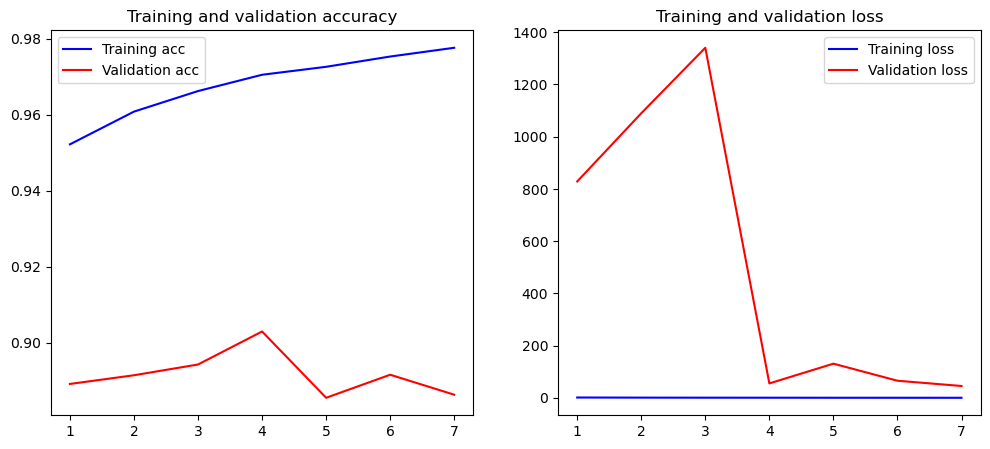

In [896]:
plot_history(history2_cnn)

In [897]:
history2_cnn = cnn_model.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 3 , validation_data=(X_val,y_val) ,verbose =1)

Epoch 1/3
246/246 [==============================] - 49s 201ms/step - loss: 0.5446 - accuracy: 0.9801 - precision: 0.8674 - recall: 0.7818 - val_loss: 11.3820 - val_accuracy: 0.9175 - val_precision: 0.2843 - val_recall: 0.2658
Epoch 2/3
246/246 [==============================] - 50s 202ms/step - loss: 0.5321 - accuracy: 0.9805 - precision: 0.8680 - recall: 0.7885 - val_loss: 20.1556 - val_accuracy: 0.8999 - val_precision: 0.1489 - val_recall: 0.1489
Epoch 3/3
246/246 [==============================] - 50s 202ms/step - loss: 0.4944 - accuracy: 0.9819 - precision: 0.8754 - recall: 0.8075 - val_loss: 11.8396 - val_accuracy: 0.9337 - val_precision: 0.4363 - val_recall: 0.4353


In [898]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 3s 50ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

              precision    recall  f1-score   support

           0       0.74      0.62      0.67        68
           1       0.82      0.80      0.81       176
           2       0.80      0.75      0.78        97
           3       0.70      0.68      0.69        90
           4       0.70      0.61      0.65        93
           5       0.74      0.78      0.76       108
           6       0.81      0.80      0.80       126
           7       0.77      0.79      0.78       136
           8       0.67      0.66      0.66       122
           9       0.88      0.66      0.76       155
          10       0.84      0.69      0.76        61
          11       0.61      0.66      0.63       172
          12       0.79      0.74      0.76       182
          13       0.68      0.64      0.66       151
          14       0.58      0.74      0.65       200
          15       0.83      0.95      0.89       169
          16       0.84      0.96      0.90        77

    accuracy              

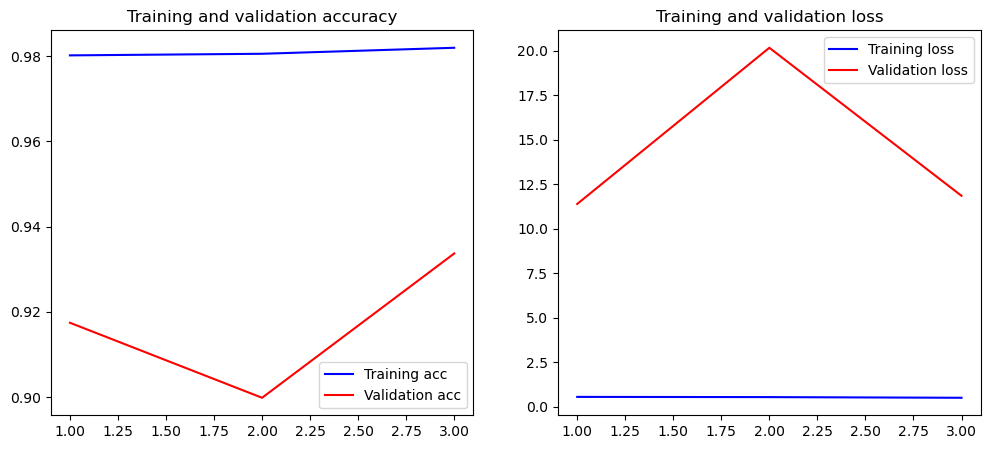

In [899]:
print(classification_report(y_test.values , predictions))

plot_history(history2_cnn)

In [919]:
for i in range(1,10):
    history2_cnn = cnn_model.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 1 , validation_data=(X_val,y_val) ,verbose =1)

    predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

    print(predictions)

    print(classification_report(y_test.values , predictions))

69/69 [==============================] - 4s 53ms/step
[5 5 5 ... 5 5 5]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.00      0.00      0.00       176
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00        93
           5       0.05      1.00      0.09       108
           6       0.00      0.00      0.00       126
           7       0.00      0.00      0.00       136
           8       0.00      0.00      0.00       122
           9       0.00      0.00      0.00       155
          10       0.00      0.00      0.00        61
          11       0.00      0.00      0.00       172
          12       0.00      0.00      0.00       182
          13       0.00      0.00      0.00       151
          14       0.00      0.00      0.00       200
          15       0.00      0.00      0.00       169
         

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


69/69 [==============================] - 4s 54ms/step
[2 2 2 ... 2 2 2]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.00      0.00      0.00       176
           2       0.04      1.00      0.09        97
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00       126
           7       0.00      0.00      0.00       136
           8       0.00      0.00      0.00       122
           9       0.00      0.00      0.00       155
          10       0.00      0.00      0.00        61
          11       0.00      0.00      0.00       172
          12       0.00      0.00      0.00       182
          13       0.00      0.00      0.00       151
          14       0.00      0.00      0.00       200
          15       0.00      0.00      0.00       169
         

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


69/69 [==============================] - 4s 55ms/step
[8 8 8 ... 8 8 8]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.00      0.00      0.00       176
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00        93
           5       1.00      0.01      0.02       108
           6       0.00      0.00      0.00       126
           7       0.00      0.00      0.00       136
           8       0.06      1.00      0.11       122
           9       0.00      0.00      0.00       155
          10       0.00      0.00      0.00        61
          11       0.00      0.00      0.00       172
          12       0.00      0.00      0.00       182
          13       0.38      0.02      0.04       151
          14       0.00      0.00      0.00       200
          15       0.00      0.00      0.00       169
         

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


69/69 [==============================] - 4s 53ms/step
[10  1  3 ...  2 10 12]
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        68
           1       0.72      0.65      0.68       176
           2       0.15      0.98      0.25        97
           3       0.36      0.81      0.50        90
           4       0.95      0.20      0.34        93
           5       0.62      0.73      0.67       108
           6       0.93      0.44      0.59       126
           7       0.92      0.08      0.15       136
           8       0.51      0.52      0.52       122
           9       0.96      0.15      0.27       155
          10       0.15      0.97      0.26        61
          11       0.67      0.01      0.02       172
          12       0.82      0.60      0.70       182
          13       0.74      0.30      0.42       151
          14       0.72      0.07      0.12       200
          15       0.82      0.64      0.72       169
   

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


69/69 [==============================] - 4s 54ms/step
[14  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.57      0.56      0.56        68
           1       0.81      0.73      0.77       176
           2       0.61      0.78      0.69        97
           3       0.65      0.62      0.64        90
           4       0.73      0.52      0.60        93
           5       0.72      0.73      0.72       108
           6       0.80      0.78      0.79       126
           7       0.70      0.78      0.74       136
           8       0.68      0.69      0.69       122
           9       0.82      0.66      0.73       155
          10       0.68      0.72      0.70        61
          11       0.55      0.63      0.59       172
          12       0.80      0.75      0.77       182
          13       0.61      0.66      0.63       151
          14       0.61      0.56      0.59       200
          15       0.83      0.88      0.85       169
   

In [971]:
def plot_history2(history):
    acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    #plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    #plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

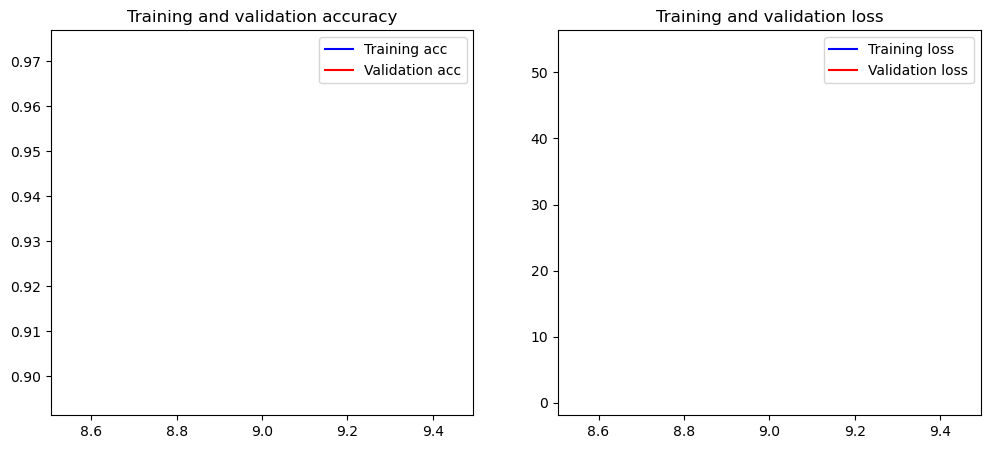

In [920]:
plot_history2(history2_cnn , 9)

In [921]:
history2_cnn = cnn_model.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 10 , validation_data=(X_val,y_val) ,verbose =1)

predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

Epoch 1/10
246/246 [==============================] - 52s 213ms/step - loss: 0.7139 - accuracy: 0.9737 - precision: 0.8285 - recall: 0.6978 - val_loss: 60.1578 - val_accuracy: 0.8937 - val_precision: 0.0962 - val_recall: 0.0962
Epoch 2/10
246/246 [==============================] - 50s 203ms/step - loss: 0.6871 - accuracy: 0.9754 - precision: 0.8371 - recall: 0.7213 - val_loss: 35.0375 - val_accuracy: 0.9004 - val_precision: 0.1527 - val_recall: 0.1523
Epoch 3/10
246/246 [==============================] - 50s 202ms/step - loss: 0.6230 - accuracy: 0.9770 - precision: 0.8473 - recall: 0.7436 - val_loss: 16.7010 - val_accuracy: 0.9001 - val_precision: 0.1502 - val_recall: 0.1501
Epoch 4/10
246/246 [==============================] - 50s 203ms/step - loss: 0.5853 - accuracy: 0.9784 - precision: 0.8553 - recall: 0.7622 - val_loss: 91.5950 - val_accuracy: 0.8958 - val_precision: 0.1145 - val_recall: 0.1145
Epoch 5/10
246/246 [==============================] - 49s 200ms/step - loss: 0.5571 - ac

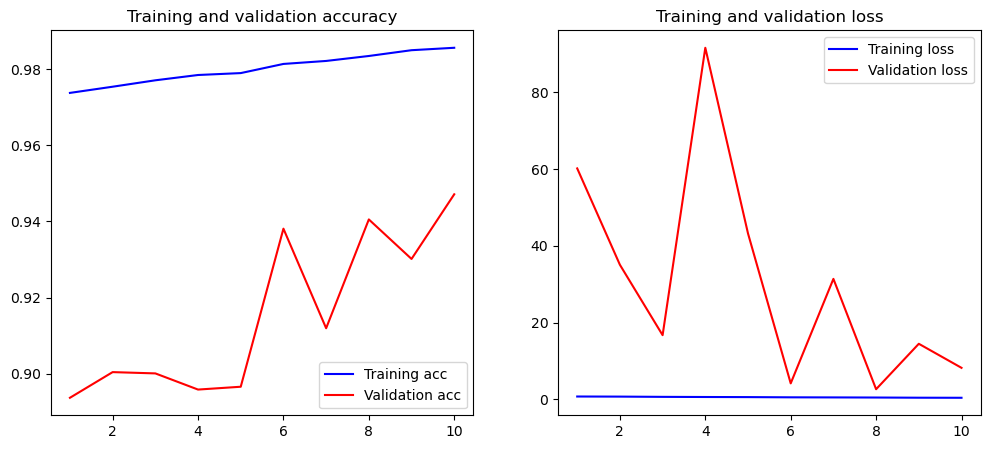

In [922]:
plot_history(history2_cnn)

In [923]:
history2_cnn = cnn_model.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 10 , validation_data=(X_val,y_val) ,verbose =1)

predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

Epoch 1/10
246/246 [==============================] - 50s 204ms/step - loss: 0.3241 - accuracy: 0.9877 - precision: 0.9124 - recall: 0.8757 - val_loss: 3.8280 - val_accuracy: 0.9359 - val_precision: 0.4512 - val_recall: 0.4135
Epoch 2/10
246/246 [==============================] - 50s 202ms/step - loss: 0.3920 - accuracy: 0.9850 - precision: 0.8918 - recall: 0.8487 - val_loss: 234.9817 - val_accuracy: 0.8881 - val_precision: 0.0493 - val_recall: 0.0493
Epoch 3/10
246/246 [==============================] - 53s 216ms/step - loss: 0.3856 - accuracy: 0.9854 - precision: 0.8944 - recall: 0.8524 - val_loss: 19.1876 - val_accuracy: 0.9065 - val_precision: 0.2032 - val_recall: 0.2016
Epoch 4/10
246/246 [==============================] - 52s 211ms/step - loss: 0.3475 - accuracy: 0.9872 - precision: 0.9065 - recall: 0.8726 - val_loss: 51.6002 - val_accuracy: 0.8957 - val_precision: 0.1134 - val_recall: 0.1134
Epoch 5/10
246/246 [==============================] - 50s 202ms/step - loss: 0.3095 - ac

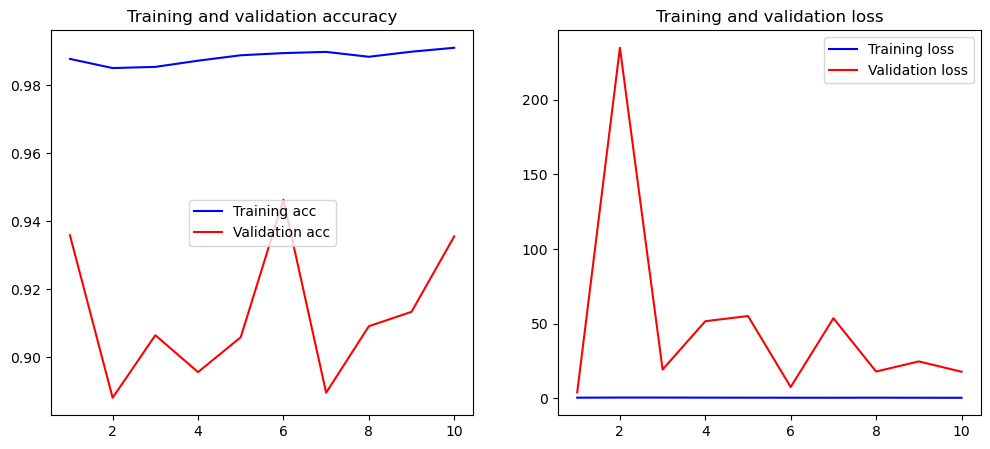

In [924]:
plot_history(history2_cnn)

In [932]:
steps = X.shape[0]//32

In [940]:
steps

341

In [933]:
X_train.shape

(8732, 1000)

In [934]:
history2_cnn = cnn_model.fit(X_train[:7859] , y_train1[:7859] , batch_size = 32 , epochs = 10 , validation_data=(X_val,y_val)
                             ,steps_per_epoch=steps ,verbose =1)

predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

Epoch 1/10
341/341 [==============================] - 78s 222ms/step - loss: 1.5711 - accuracy: 0.9534 - precision: 0.6949 - recall: 0.3703 - val_loss: 1620.2664 - val_accuracy: 0.8915 - val_precision: 0.0779 - val_recall: 0.0779
Epoch 2/10
341/341 [==============================] - 73s 213ms/step - loss: 1.1307 - accuracy: 0.9627 - precision: 0.7637 - recall: 0.5302 - val_loss: 584.7884 - val_accuracy: 0.8942 - val_precision: 0.1008 - val_recall: 0.1008
Epoch 3/10
341/341 [==============================] - 70s 204ms/step - loss: 0.9386 - accuracy: 0.9677 - precision: 0.7979 - recall: 0.6049 - val_loss: 62.9841 - val_accuracy: 0.8865 - val_precision: 0.0355 - val_recall: 0.0355
Epoch 4/10
341/341 [==============================] - 73s 215ms/step - loss: 0.7988 - accuracy: 0.9716 - precision: 0.8175 - recall: 0.6669 - val_loss: 106.1483 - val_accuracy: 0.8939 - val_precision: 0.0985 - val_recall: 0.0985
Epoch 5/10
341/341 [==============================] - 71s 209ms/step - loss: 0.7284 

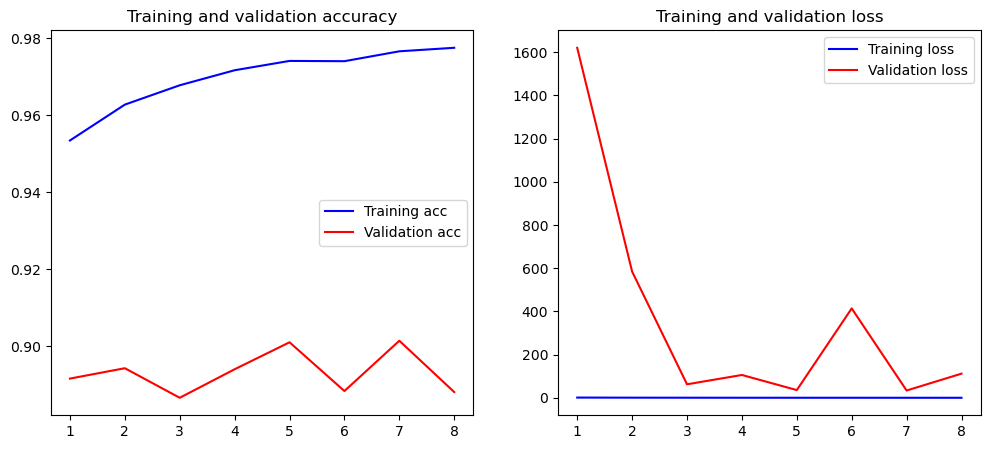

In [935]:
plot_history(history2_cnn)

In [1018]:
history2_cnn = cnn_model.fit(X_train, 
                             y_train1 , 
                             batch_size = 32 , 
                             epochs = 5 , 
                             validation_split = (0.2) ,
                             steps_per_epoch =steps ,
                             class_weigt = class_weights
                             verbose =1)

predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

Epoch 1/5
232/341 [===================>..........] - ETA: 22s - loss: 1.5835 - accuracy: 0.9511 - precision: 0.6671 - recall: 0.3374

KeyboardInterrupt: 

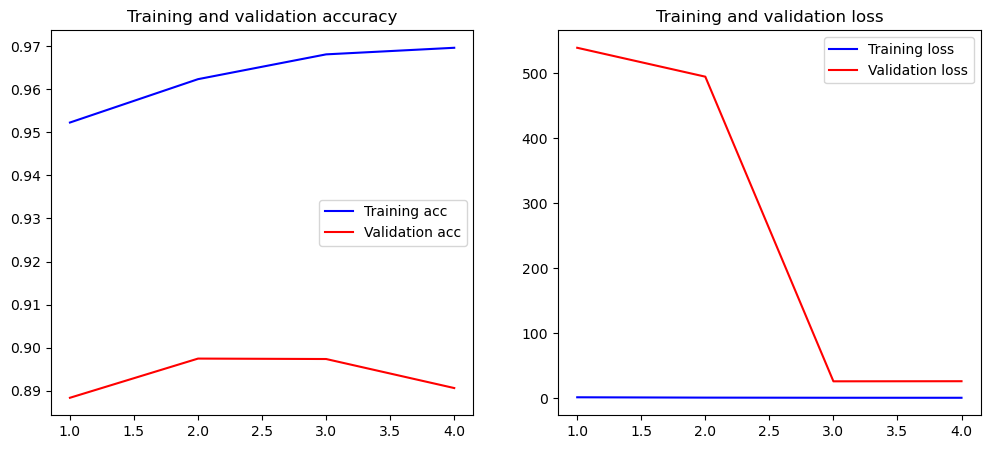

In [1007]:
plot_history(history2_cnn)

In [1008]:
scores = cnn_model.evaluate(X_test, y_test1)

for i, m in enumerate(cnn_model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

69/69 [==============================] - 4s 56ms/step - loss: 1.0461 - accuracy: 0.9664 - precision: 0.7721 - recall: 0.6083

loss: 1.046

accuracy: 0.966

precision: 0.772

recall: 0.608


In [1048]:
history2_cnn = cnn_model.fit(X_train, 
                             y_train1 , 
                             batch_size = 32 , 
                             epochs = 1 , 
                             validation_split = (0.2) ,
                             class_weight=class_weights ,
                             verbose =1)

predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 2s 29ms/step
[ 0  1 16 ...  2  9 12]
              precision    recall  f1-score   support

           0       0.31      0.78      0.44        68
           1       0.92      0.46      0.61       176
           2       0.25      0.97      0.40        97
           3       0.46      0.59      0.51        90
           4       0.51      0.67      0.58        93
           5       0.74      0.62      0.68       108
           6       0.89      0.59      0.71       126
           7       0.80      0.66      0.73       136
           8       0.60      0.61      0.61       122
           9       0.85      0.61      0.71       155
          10       0.59      0.82      0.68        61
          11       0.61      0.40      0.48       172
          12       0.85      0.45      0.59       182
          13       0.63      0.66      0.64       151
          14       0.72      0.21      0.33       200
          15       0.81      0.85      0.83       169
   

In [1038]:
# 5 epochs 69% acc
# 6 epochs 69%
# 7 epochs 68%
# 8 epochs 71%
# with "wrong class weights"

In [ ]:
# new shit
# 5 epochs---> 68%
# 6 ---> 64%
# 7 ---> 70%
# 8 ---> 71%
# 9 --->  69%
# 10 --->
# with correct class weights

In [ ]:
#plot_history(history2_cnn)

In [983]:
from sklearn.utils import compute_class_weight

In [977]:
y1

,0
0,2
1,2
2,2
3,2
4,2
...,...
10910,1
10911,1
10912,1
10913,1


In [993]:
y1_tone = y1.values.reshape(-1,1)

In [996]:
[y1_tone]

[array([[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]])]

In [1026]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y1),
                                        y = y1                                                    
                                    )
class_weights = dict(zip(np.unique(y1), class_weights))
class_weights

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{0: 2.1401960784313725,
 1: 0.8025735294117647,
 2: 1.2841176470588236,
 3: 1.2841176470588236,
 4: 1.6051470588235295,
 5: 1.05775753464483,
 6: 1.0700980392156862,
 7: 0.9172268907563025,
 8: 1.0700980392156862,
 9: 0.913312693498452,
 10: 2.147353924847531,
 11: 0.7133986928104575,
 12: 0.8025735294117647,
 13: 0.8025735294117647,
 14: 0.5836898395721926,
 15: 0.7086741981560837,
 16: 1.6051470588235295}

In [1042]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train.values.ravel()),
                                        y = y_train.values.ravel()                                                    
                                    )
class_weights = dict(zip(np.unique(y_train.values.ravel()), class_weights))
class_weights

{0: 2.213995943204868,
 1: 0.8231523378582202,
 2: 1.2745584586191796,
 3: 1.2527977044476326,
 4: 1.6731174554512358,
 5: 1.0293528232936462,
 6: 1.083643584015885,
 7: 0.9107217355027117,
 8: 1.0745754368693083,
 9: 0.9373121511378274,
 10: 2.158180919426594,
 11: 0.7055591467356174,
 12: 0.8311441081286883,
 13: 0.7914438502673797,
 14: 0.570718954248366,
 15: 0.6969430920264985,
 16: 1.5902385722090693}

In [ ]:
class_weight = {0: 1.,
                1: 50.,
                2: 2.}

In [ ]:
class_weight=class_weight

In [1027]:
from sklearn.utils.class_weight import compute_class_weight